In [7]:
import pandas as pd
import os
import numpy as np

In [3]:
base = 'data/'
files = os.listdir(base)

In [4]:
corrects = []
answers = []
for file in files:
    if(file == '.ipynb_checkpoints'):
        continue
    data = pd.read_csv(base+file)
    for row in data.iterrows():
        correct = row[1]['Correct']
        answered = row[1]['H1_textbox.text']
        if(np.isnan(answered)):
            answered = -1
        else:
            answered = int(answered)
        corrects.append(correct)
        answers.append(answered)
corrects = np.array(corrects)
answers = np.array(answers)

In [5]:
data.columns

Index(['stimulus', 'stim', 'Correct', 'trials.thisRepN', 'trials.thisTrialN',
       'trials.thisN', 'trials.thisIndex', 'button_yes_2.started',
       'button_hint_2.started', 'button_hint_2.stopped',
       'button_yes_2.stopped', 'mouse_track_2.x', 'mouse_track_2.y',
       'mouse_track_2.leftButton', 'mouse_track_2.midButton',
       'mouse_track_2.rightButton', 'mouse_track_2.time', 'H1_textbox_2.text',
       'RSP_ahhaa_2.response', 'RSP_ahhaa_2.rt', 'RSP_ahhaa_2.history',
       'RSP_sudden_2.response', 'RSP_sudden_2.rt', 'RSP_sudden_2.history',
       'RSP_pleasant_2.response', 'RSP_pleasant_2.rt',
       'RSP_pleasant_2.history', 'practice_object.started', 'text_2.started',
       'practice_object.stopped', 'practice_outline.started', 'image.started',
       'button_yes.started', 'button_hint.started', 'button_hint.stopped',
       'button_yes.stopped', 'mouse_track.x', 'mouse_track.y',
       'mouse_track.leftButton', 'mouse_track.midButton',
       'mouse_track.rightButton',

In [6]:
scores = (corrects == answers)

In [7]:
accuracy = np.sum(scores)/len(scores)

In [8]:
accuracy

0.5947368421052631

In [9]:
confusion = np.zeros((10,11))
for i,c in enumerate(corrects):
    confusion[c,answers[i]] += 1

In [22]:
answers = list(np.arange(10))
answers.append('others')

In [23]:
answers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'others']

[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9')]

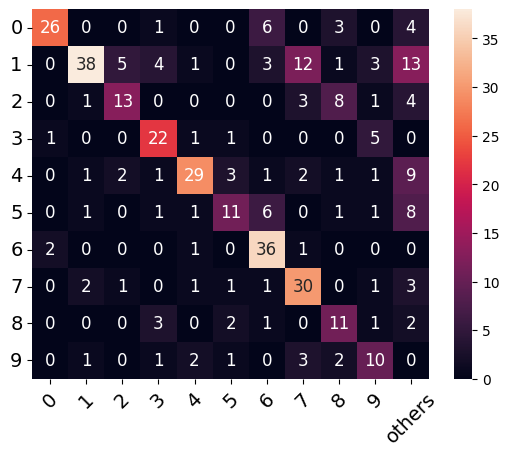

In [24]:
import seaborn as sns
ax = sns.heatmap(confusion, annot=True,annot_kws={"size": 12})
ax.set_xticklabels(answers, rotation=45, fontsize=14)  # X-ticks with rotation
ax.set_yticklabels(np.arange(0,10), rotation=0, fontsize=14)

# Search for correlation

In [4]:
data_search = pd.read_csv('../Search/MNIST_11.csv')
confusion_search = np.zeros((10,10))
for row in data_search.iterrows():
    correct = int(row[1]['Correct'])
    answered = int(row[1]['Answered'])
    confusion_search[correct,answered] += 1

[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9')]

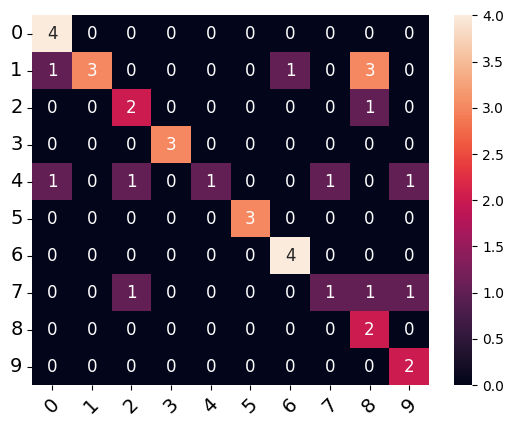

In [5]:
import seaborn as sns
ax = sns.heatmap(confusion_search, annot=True,annot_kws={"size": 12})
ax.set_xticklabels(np.arange(0,10), rotation=45, fontsize=14)  # X-ticks with rotation
ax.set_yticklabels(np.arange(0,10), rotation=0, fontsize=14)

In [6]:
np.corrcoef(confusion[:,:10].flatten(),confusion_search.flatten())

NameError: name 'confusion' is not defined

In [ ]:
f_confusion = confusion[:,:10].flatten()
f_search = confusion_search.flatten()

In [ ]:
inds = np.where(~((f_confusion ==0) & (f_search==0)))

In [ ]:
np.corrcoef(f_search[inds],f_confusion[inds])

In [ ]:
f_search[inds]

In [26]:
f_confusion[inds]

array([26.,  1.,  6.,  3.,  0., 38.,  5.,  4.,  1.,  3., 12.,  1.,  3.,
        1., 13.,  3.,  8.,  1.,  1., 22.,  1.,  1.,  5.,  0.,  1.,  2.,
        1., 29.,  3.,  1.,  2.,  1.,  1.,  1.,  1.,  1., 11.,  6.,  1.,
        1.,  2.,  1., 36.,  1.,  2.,  1.,  1.,  1.,  1., 30.,  0.,  1.,
        3.,  2.,  1., 11.,  1.,  1.,  1.,  2.,  1.,  3.,  2., 10.])

## Reaction time

In [8]:
data_search = pd.read_csv('../Search/MNIST_11.csv')
search_iters = []
for row in data_search.iterrows():
    search_iters.append(row[1]['Iteration'])

In [9]:
file_list = [96,
 55,
 19,
 77,
 20,
 85,
 71,
 1,
 61,
 45,
 10,
 75,
 94,
 5,
 93,
 86,
 52,
 24,
 9,
 46,
 84,
 98,
 40,
 57,
 33,
 22,
 88,
 69,
 17,
 39,
 97,
 31,
 6,
 43,
 32,
 30,
 21,
 15]

In [10]:
# reaction times for humans
base = 'data/'
files = os.listdir(base)
reaction_times = np.zeros((10,38))
i=0
for file in files:
    if(file == '.ipynb_checkpoints'):
        continue
    data = pd.read_csv(base+file)
    for row in data.iterrows():
        stimulus = int(row[1]['stimulus'].split('_')[2])
        ind = file_list.index(stimulus)
        rt = float(row[1]['RSP_ahhaa.rt'])
        reaction_times[i,ind]= rt
    i += 1

In [11]:
reaction_times.shape

(10, 38)

In [12]:
human_rt =np.nanmean(reaction_times,axis =0)

In [13]:
human_rt 

array([51.23082016, 18.28805568, 39.1485071 , 56.2727457 , 55.28520642,
       33.39116589, 28.70131706, 31.37052981, 63.76226688, 52.49633084,
       57.09033634, 40.58993473, 43.19614823, 26.07081238, 35.23757186,
       15.55964439, 44.24270098, 44.68056083, 34.19310844, 26.78080095,
       57.70143547, 33.8941073 , 50.5957031 , 40.89233996, 46.69367431,
       62.11060758, 31.70341667, 79.64205925, 28.89740859, 38.71553365,
       34.83693982, 38.80359898, 30.37411808, 63.7036117 , 48.66611882,
       25.77789973, 18.70425201, 45.52766579])

In [14]:
import scipy
scipy.stats.pearsonr(search_iters, human_rt)

PearsonRResult(statistic=-0.07228836359079538, pvalue=0.6662541661211198)

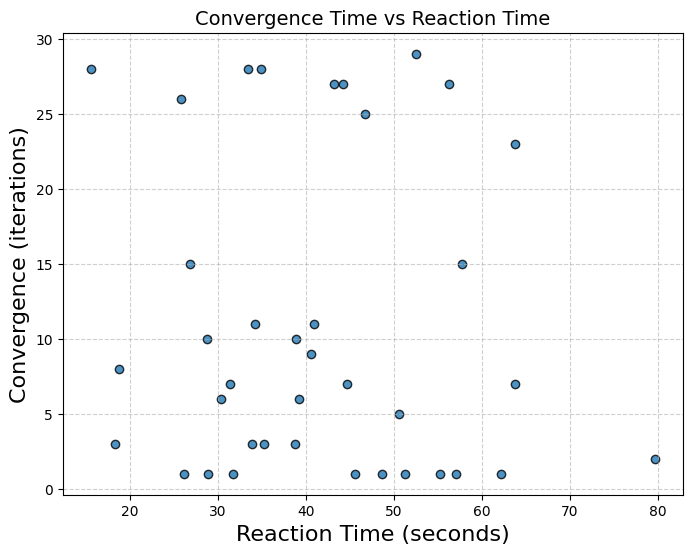

In [19]:
   # Algorithm convergence times
from matplotlib import pyplot as plt
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(human_rt, search_iters, alpha=0.8, edgecolors='k')

# Labels and title
plt.title("Convergence Time vs Reaction Time", fontsize=14)
plt.xlabel("Reaction Time (seconds)", fontsize=16)
plt.ylabel("Convergence (iterations)", fontsize=16)

# Adding trend line (optional)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [16]:
import numpy as np
from scipy.stats import pearsonr

# Example: Simulated reaction time data (stimuli x participants)
data = np.transpose(np.nan_to_num(reaction_times,nan=30))  # 100 stimuli, 10 participants

# Compute noise ceiling using leave-one-out correlations
noise_ceiling = []
for i in range(data.shape[1]):
    others = np.mean(np.delete(data, i, axis=1), axis=1)
    corr, _ = pearsonr(data[:, i], others)
    noise_ceiling.append(corr)

average_noise_ceiling = np.mean(noise_ceiling)
print(f"Average Noise Ceiling: {average_noise_ceiling:.3f}")

Average Noise Ceiling: 0.352
